In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting

In [2]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}

rcParams.update(config)  ## 设置画图的一些参数

In [3]:
path = 'C:/Users/wyp/Desktop/regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head() # 返回data中的前几行数据，默认是前5行。  

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是人口一列
y_data = data.iloc[:,cols-1:]#y是收益一列

数据归一化

In [5]:
X_1=(X_data-X_data.min())/(X_data.max()-X_data.min())

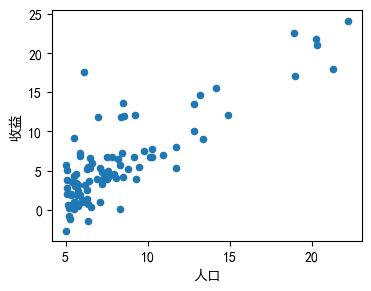

In [6]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

In [7]:
X_1.insert(0, 'Ones', 1)

In [8]:
X_1.head()#head()是观察前5行

,Ones,人口
0,1,0.063064
1,1,0.029157
2,1,0.203288
3,1,0.115061
4,1,0.048492


In [9]:
X=X_1.values
Y=y_data.values

In [10]:
def bin_mult(X,Y):
    t=np.linalg.inv(X.T@X)
    w=t@X.T@Y
    return w

In [11]:
def computeCost(X, Y, W):
    Y_hat = np.dot(X,W)
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])# (m,n) @ (n, 1) -> (n, 1)
    return loss

In [12]:
def linearRegression(X,Y,itters):
    loss_his=[]
    m=X.shape[1]
    w=np.zeros((m,1))
    for i in range(iters):
        loss=computeCost(X,Y,w)
        loss_his.append(loss)
        w=bin_mult(X,Y)
    return loss_his,w

In [13]:
iters=10000
loss_his,w=linearRegression(X,Y,iters)
w

array([[ 2.10147995],
       [20.49166518]])

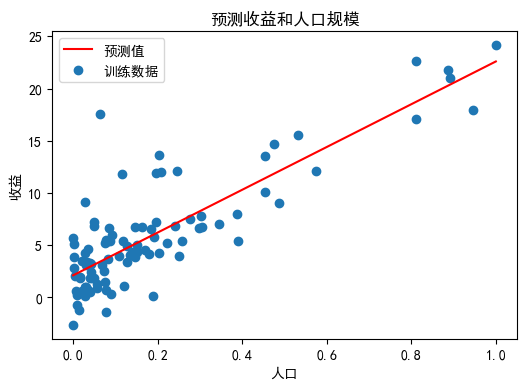

In [14]:
x = np.linspace(X_1['人口'].min(), X_1['人口'].max(), 100)
f = w[0, 0] + (w[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_1['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('预测收益和人口规模')
plt.show()

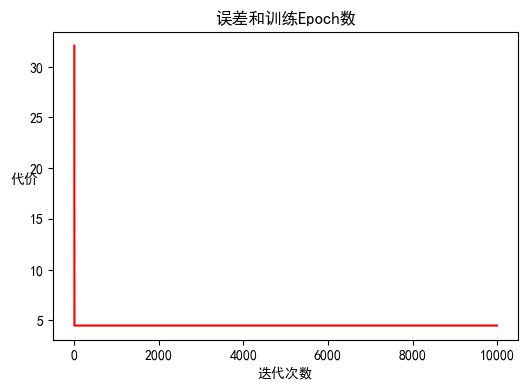

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his, 'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()